To calculate the **Overall Frozen Market Index**, you'll combine your four sub-indices:

* **Labor Market Tightness Index** (Tightness)
* **Labor Market Distress Index** (Distress)
* **Labor Market Mobility & Confidence Index** (Mobility)
* **Labor Compensation Pressure Index** (Compensation)

---

### 🎯 **Conceptual Logic**

A “frozen” labor market typically shows:

* **Low Tightness** (↓ demand for labor)
* **High Distress** (↑ unemployment/slack)
* **Low Mobility/Confidence** (↓ voluntary quits, ↑ layoffs)
* **Low Compensation Pressure** (↓ wage growth, ↓ work hours)

So your **Frozen Market Index** should:

* **Inversely reflect Tightness, Mobility, Compensation**
* **Directly reflect Distress**

---

### ✅ Formula (standardized direction):

```python
Frozen_Market_Index = (
    -1 * zscore(Tightness_Index)
    + 1 * zscore(Distress_Index)
    -1 * zscore(Mobility_Confidence_Index)
    -1 * zscore(Compensation_Pressure_Index)
) / 4
```

---

### 🧠 Why This Makes Sense

| Component                   | Freeze Signal  | Direction |
| --------------------------- | -------------- | --------- |
| Labor Tightness Index       | ↓ Tightness    | Negative  |
| Labor Distress Index        | ↑ Distress     | Positive  |
| Mobility & Confidence Index | ↓ Mobility     | Negative  |
| Compensation Pressure Index | ↓ Compensation | Negative  |

---

### 🧪 Code Example

Assuming you already have a DataFrame `all_indices_df` with these columns:

```python
['Labor_Market_Tightness_Index',
 'Labor_Market_Distress_Index',
 'Labor_Market_Mobility_Confidence_Index',
 'Labor_Compensation_Pressure_Index']
```

You can calculate the frozen index like this:

```python
from scipy.stats import zscore

# Z-score each index
all_indices_df['Tightness_z'] = zscore(all_indices_df['Labor_Market_Tightness_Index'], nan_policy='omit')
all_indices_df['Distress_z'] = zscore(all_indices_df['Labor_Market_Distress_Index'], nan_policy='omit')
all_indices_df['Mobility_z'] = zscore(all_indices_df['Labor_Market_Mobility_Confidence_Index'], nan_policy='omit')
all_indices_df['Compensation_z'] = zscore(all_indices_df['Labor_Compensation_Pressure_Index'], nan_policy='omit')

# Combine into the Frozen Market Index
all_indices_df['Frozen_Market_Index'] = (
    -all_indices_df['Tightness_z'] +
     all_indices_df['Distress_z'] -
     all_indices_df['Mobility_z'] -
     all_indices_df['Compensation_z']
) / 4
```

---

### 📈 Optional: Plot It

```python
all_indices_df.set_index('observation_date')['Frozen_Market_Index'].plot(
    title='Overall Frozen Labor Market Index',
    figsize=(12, 5)
)
```

---

Would you like to threshold this into freeze levels (e.g., Normal / Stagnating / Frozen) or visualize it with recession overlays?


<Axes: title={'center': 'Frozen Market Index'}, xlabel='observation_date'>

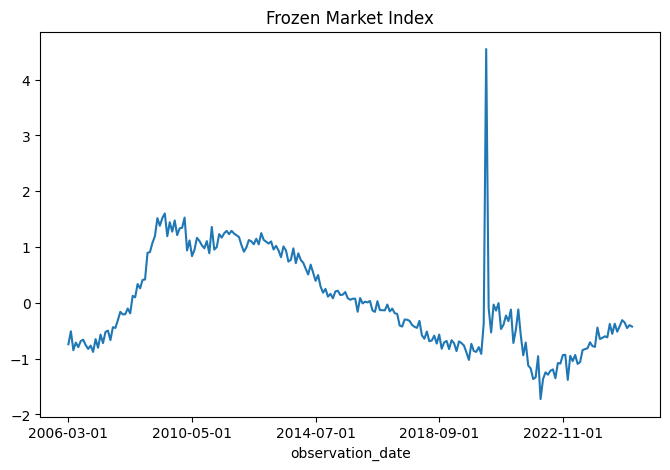

In [14]:
import pandas as pd
from scipy.stats import zscore

import os

# Load each index CSV
tight_df = pd.read_csv('Labor_Market_Tightness_Index.csv')
distress_df = pd.read_csv('Labor_Market_Distress_Index.csv')
mobility_df = pd.read_csv('Labor_Market_Mobility_Confidence_Index.csv')
comp_df = pd.read_csv('Labor_Compensation_Pressure_Index.csv')


# Merge all on observation_date
frozen_df = tight_df.merge(distress_df, on='observation_date') \
                    .merge(mobility_df, on='observation_date') \
                    .merge(comp_df, on='observation_date')

# Rename columns for clarity
frozen_df.rename(columns={
    'Labor_Market_Tightness_Index': 'Tightness',
    'Labor_Market_Distress_Index': 'Distress',
    'Labor_Market_Mobility_Confidence_Index': 'Mobility',
    'Labor_Compensation_Pressure_Index': 'Compensation'
}, inplace=True)

# Calculate z-scored Frozen Market Index
frozen_df['Frozen_Market_Index'] = (
    -zscore(frozen_df['Tightness'], nan_policy='omit') +
     zscore(frozen_df['Distress'], nan_policy='omit') -
     zscore(frozen_df['Mobility'], nan_policy='omit') -
     zscore(frozen_df['Compensation'], nan_policy='omit')
) / 4

# Optional: Save final frozen index to CSV
os.makedirs('Frozen_Market', exist_ok=True)
frozen_df[['observation_date', 'Frozen_Market_Index']].to_csv(
    'Frozen_Market/Frozen_Market_Index.csv', index=False
)

# Plot
frozen_df.set_index('observation_date')['Frozen_Market_Index'].plot(
    title='Frozen Market Index',
    figsize=(8, 5)
)
